In [26]:
from ultralytics import YOLO
import os
import pydicom
import matplotlib.pyplot as plt

In [15]:
model = YOLO("runs/detect/train11/weights/best.pt")
model.eval()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [10]:
anno_dir = '/data_vault/hexai02/CarpalTunnel/Annotations'
dicom_dir = '/data_vault/hexai02/CarpalTunnel/Images'

In [13]:
def load_dicom(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    return dicom_data.pixel_array[: 450, 200: 1300]


0: 480x1120 (no detections), 9.5ms
Speed: 8.8ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 1120)


IndexError: index 0 is out of bounds for dimension 0 with size 0

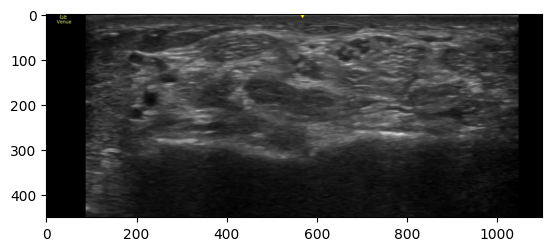

In [41]:
dicom_images = os.listdir(dicom_dir)

# for i in range(len(dicom_images)):
filename = '143.dcm'
dicom_path = os.path.join(dicom_dir, filename)
dicom_img = load_dicom(dicom_path)
result = model(dicom_img, save=False, save_txt=False, save_conf=False)

plt.imshow(dicom_img, cmap='gray')
box = result[0].boxes[0]
x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
print(x1, y1, x2, y2)
plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='r', facecolor='none', linewidth=2))
plt.show()


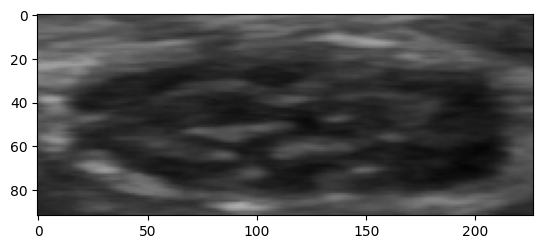

In [36]:

plt.imshow(dicom_img[y1:y2, x1:x2], cmap='gray')